In [1]:
pip install pandas scikit-learn matplotlib

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [3]:
#reading csv file
df=pd.read_csv('tested.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [4]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
df.shape

(418, 12)

In [6]:
df['Pclass'].count()

418

In [7]:
df['Name'].count()

418

In [8]:
df['Pclass'].unique()

array([3, 2, 1], dtype=int64)

In [9]:
df['Sex'].value_counts()

male      266
female    152
Name: Sex, dtype: int64

In [10]:
df['Survived'].value_counts()

0    266
1    152
Name: Survived, dtype: int64

In [11]:
df['Sex'].min()

'female'

In [12]:
df['Survived'].max()

1

In [13]:
a = df['Survived'].value_counts()
a

0    266
1    152
Name: Survived, dtype: int64

<AxesSubplot:ylabel='Survived'>

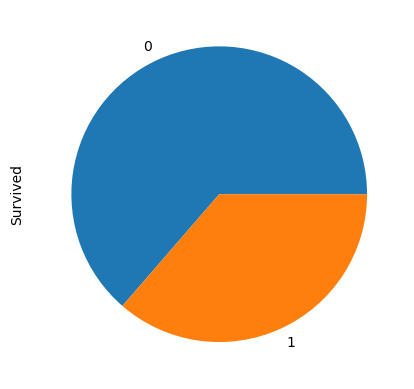

In [15]:
%matplotlib inline
a.plot(kind='pie')

In [16]:
b = df.mean()
b

C:\Users\admin\AppData\Local\Temp\ipykernel_19780\1011970968.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  b = df.mean()


PassengerId    1100.500000
Survived          0.363636
Pclass            2.265550
Age              30.272590
SibSp             0.447368
Parch             0.392344
Fare             35.627188
dtype: float64

<AxesSubplot:>

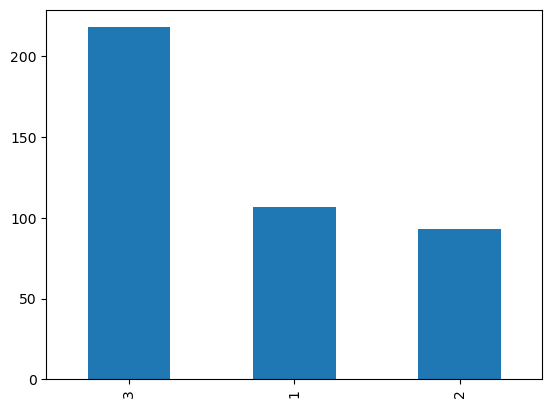

In [17]:
df['Pclass'].value_counts().plot(kind='bar')

In [18]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [20]:
grp = df.groupby('Sex')
grp.count()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Sex,,,,,,,,,,,
female,152,152,152,152,127,152,152,152,152,44,152
male,266,266,266,266,205,266,266,266,265,47,266


In [21]:
df.count()

PassengerId    418
Survived       418
Pclass         418
Name           418
Sex            418
Age            332
SibSp          418
Parch          418
Ticket         418
Fare           417
Cabin           91
Embarked       418
dtype: int64

In [22]:
grp

In [23]:
grp2 = df.groupby(['Survived','Sex'])
grp2.count()

,,PassengerId,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Survived,Sex,,,,,,,,,,
0,male,266,266,266,205,266,266,266,265,47,266
1,female,152,152,152,127,152,152,152,152,44,152


<AxesSubplot:xlabel='Survived,Sex,Survived'>

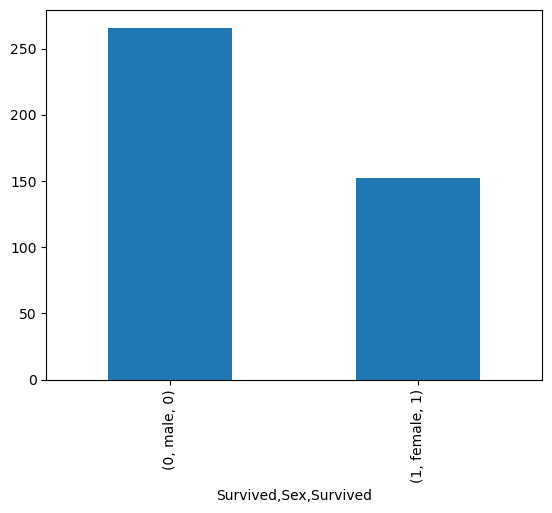

In [24]:
k=grp2['Survived'].value_counts()
k.plot(kind = 'bar')

In [25]:
grp3 = df.groupby(['Survived','Pclass'])
grp3.count()

PassengerId  Name  Sex  Age  SibSp  Parch  Ticket  Fare  \
Survived Pclass                                                            
0        1                57    57   57   50     57     57      57    57   
         2                63    63   63   59     63     63      63    63   
         3               146   146  146   96    146    146     146   145   
1        1                50    50   50   48     50     50      50    50   
         2                30    30   30   29     30     30      30    30   
         3                72    72   72   50     72     72      72    72   

                 Cabin  Embarked  
Survived Pclass                   
0        1          40        57  
         2           4        63  
         3           3       146  
1        1          40        50  
         2           3        30  
         3           1        72

<AxesSubplot:xlabel='Survived,Pclass,Survived'>

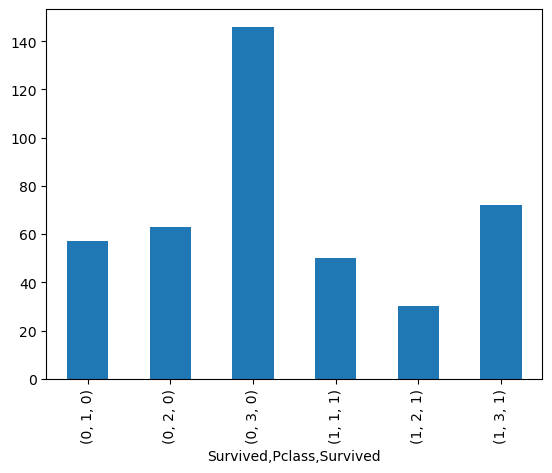

In [26]:
h = grp3['Survived'].value_counts()
h.plot(kind = 'bar')

In [27]:
grp4 = df.groupby(['Survived','Sex','Pclass'])
grp4.count()

PassengerId  Name  Age  SibSp  Parch  Ticket  Fare  \
Survived Sex    Pclass                                                       
0        male   1                57    57   50     57     57      57    57   
                2                63    63   59     63     63      63    63   
                3               146   146   96    146    146     146   145   
1        female 1                50    50   48     50     50      50    50   
                2                30    30   29     30     30      30    30   
                3                72    72   50     72     72      72    72   

                        Cabin  Embarked  
Survived Sex    Pclass                   
0        male   1          40        57  
                2           4        63  
                3           3       146  
1        female 1          40        50  
                2           3        30  
                3           1        72

<AxesSubplot:xlabel='Survived,Sex,Pclass,Survived'>

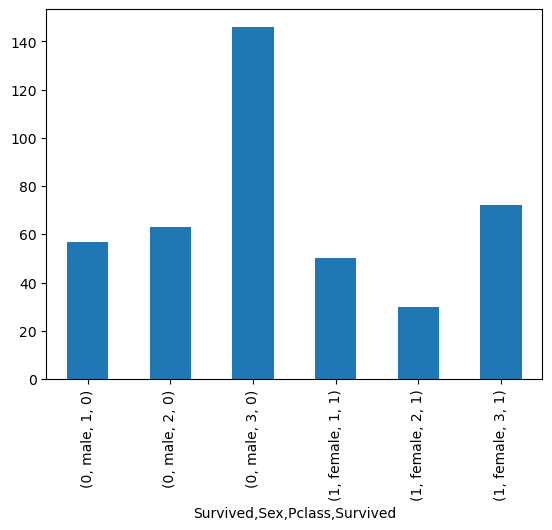

In [28]:
i=grp4['Survived'].value_counts()
i.plot(kind = 'bar')

In [29]:
df['SibSp'].unique()

array([0, 1, 2, 3, 4, 5, 8], dtype=int64)

In [30]:
grp5 = df.groupby(['Pclass','SibSp'])
grp5.count()

PassengerId  Survived  Name  Sex  Age  Parch  Ticket  Fare  \
Pclass SibSp                                                               
1      0               61        61    61   61   52     61      61    61   
       1               42        42    42   42   42     42      42    42   
       2                3         3     3    3    3      3       3     3   
       3                1         1     1    1    1      1       1     1   
2      0               62        62    62   62   57     62      62    62   
       1               27        27    27   27   27     27      27    27   
       2                4         4     4    4    4      4       4     4   
3      0              160       160   160  160  105    160     160   159   
       1               41        41    41   41   28     41      41    41   
       2                7         7     7    7    4      7       7     7   
       3                3         3     3    3    3      3       3     3   
       4                4         4     4    4    4      4       4     4   
       5                1         1     1    1    1      1       1     1   
       8                2         2     2    2    1      2       2     2   

              Cabin  Embarked  
Pclass SibSp                   
1      0         36        61  
       1         40        42  
       2          3         3  
       3          1         1  
2      0          6        62  
       1          0        27  
       2          1         4  
3      0          3       160  
       1          1        41  
       2          0         7  
       3          0         3  
       4          0         4  
       5          0         1  
       8          0         2

<AxesSubplot:xlabel='Pclass,SibSp,Survived'>

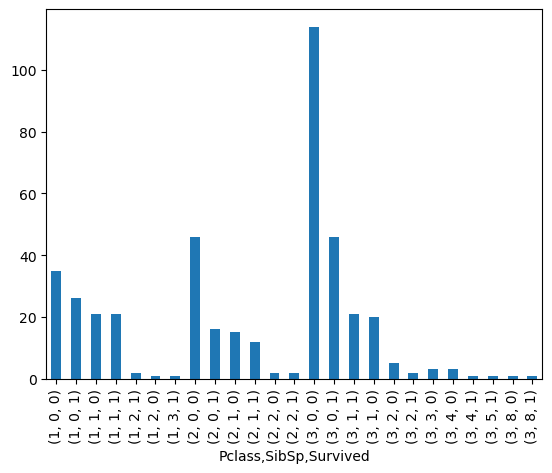

In [31]:
l=grp5['Survived'].value_counts()
l.plot(kind ='bar')

In [32]:
df['Parch'].unique()

array([0, 1, 3, 2, 4, 6, 5, 9], dtype=int64)

In [33]:
grp6 = df.groupby(['Pclass','Parch'])
grp6.count()

PassengerId  Survived  Name  Sex  Age  SibSp  Ticket  Fare  \
Pclass Parch                                                               
1      0               79        79    79   79   70     79      79    79   
       1               19        19    19   19   19     19      19    19   
       2                6         6     6    6    6      6       6     6   
       3                2         2     2    2    2      2       2     2   
       4                1         1     1    1    1      1       1     1   
2      0               72        72    72   72   67     72      72    72   
       1               11        11    11   11   11     11      11    11   
       2                9         9     9    9    9      9       9     9   
       3                1         1     1    1    1      1       1     1   
3      0              173       173   173  173  110    173     173   172   
       1               22        22    22   22   20     22      22    22   
       2               18        18    18   18   14     18      18    18   
       4                1         1     1    1    0      1       1     1   
       5                1         1     1    1    1      1       1     1   
       6                1         1     1    1    1      1       1     1   
       9                2         2     2    2    0      2       2     2   

              Cabin  Embarked  
Pclass Parch                   
1      0         56        79  
       1         15        19  
       2          6         6  
       3          2         2  
       4          1         1  
2      0          5        72  
       1          1        11  
       2          0         9  
       3          1         1  
3      0          3       173  
       1          1        22  
       2          0        18  
       4          0         1  
       5          0         1  
       6          0         1  
       9          0         2

<AxesSubplot:xlabel='Pclass,Parch,Survived'>

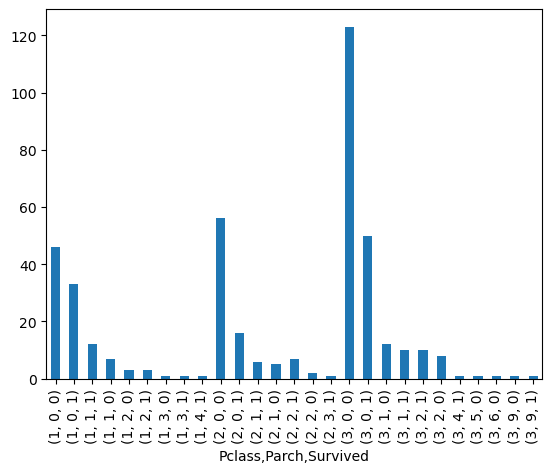

In [34]:
i=grp6['Survived'].value_counts()
i.plot(kind = 'bar')

In [35]:
df['Embarked'].unique()

array(['Q', 'S', 'C'], dtype=object)

In [36]:
# Display the first few rows of the dataset
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [37]:
# Drop unnecessary columns (PassengerId, Name, Ticket, Cabin)
df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

# Fill missing values in the Age column with the median age
df['Age'].fillna(df['Age'].median(), inplace=True)

# Convert categorical features (Sex and Embarked) into numerical representations
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Embarked'] = df['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

# Handle any remaining missing values (Fare and Embarked columns)
df.fillna(0, inplace=True)

# Feature selection: Define features (X) and target variable (y)
X = df.drop('Survived', axis=1)
y = df['Survived']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [38]:
# Initialize and train the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{class_report}")

Accuracy: 1.00
Confusion Matrix:
[[50  0]
 [ 0 34]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        34

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



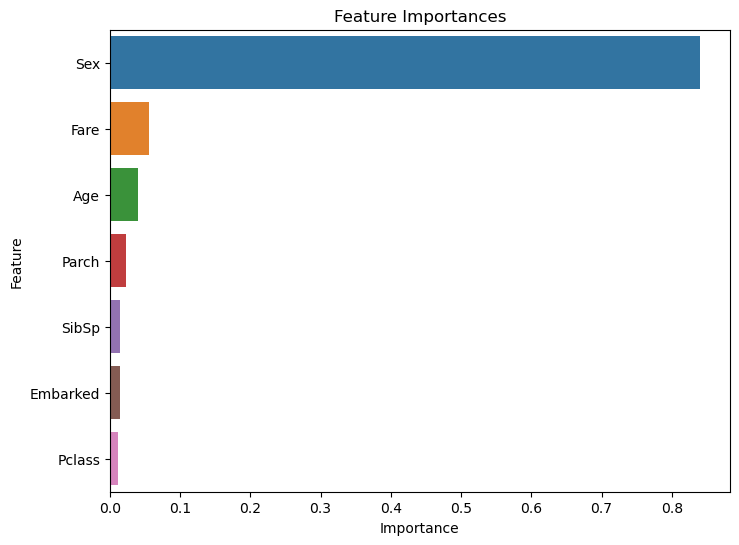

In [39]:
# Extract feature importances from the trained model
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': rf_classifier.feature_importances_})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(8, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()